## Question1

先將作業所需套件載入

In [71]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
import numpy as np

In [72]:
data = np.array([
    [0, 0.3, 0.4, 0.7],
    [0.3, 0, 0.5, 0.8],
    [0.4, 0.5, 0, 0.45],
    [0.7, 0.8, 0.45, 0]
])

將題目指定matrix改為condensed_matrix形式，利於scipy.cluster套件運作。

In [73]:
condensed_data = np.array([0.3, 0.4, 0.7, 0.5, 0.8, 0.45])

## (a)

畫出complete linkage下階層式分群法的dendrogram，並在y軸標出各群之間的距離。

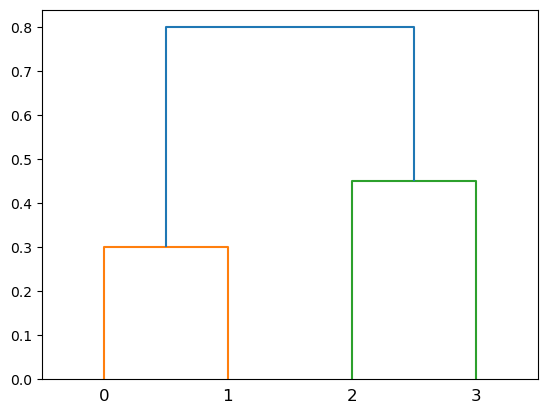

In [74]:
complete_Z = hierarchy.linkage(condensed_data, 'complete','euclidean')
plt.figure()
dn = hierarchy.dendrogram(complete_Z)

## (b)

改為使用single linkage方式。

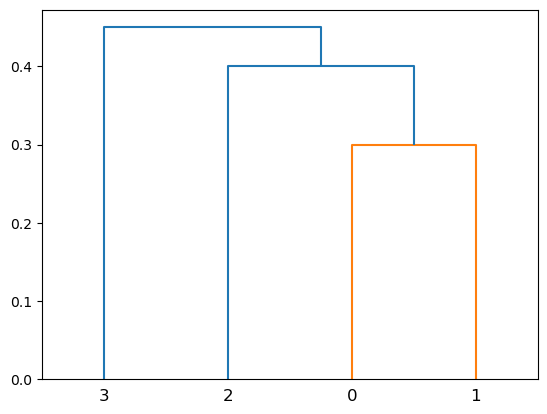

In [75]:
single_Z = hierarchy.linkage(condensed_data, 'single','euclidean')
plt.figure()
dn = hierarchy.dendrogram(single_Z)

## (c)

可使用clustering.labels_或依照前圖判斷分為兩組為((0,1)(2,3))形式

In [76]:
from sklearn.cluster import AgglomerativeClustering
comp_model = AgglomerativeClustering(affinity='precomputed', n_clusters=2, linkage='complete').fit(data)
print(comp_model.labels_)

[1 1 0 0]


# (d)

single linkage則為(((0,1)2),3)分為兩組形式。

In [77]:
single_model = AgglomerativeClustering(affinity='precomputed', n_clusters=2, linkage='single').fit(data)
print(single_model.labels_)

[0 0 0 1]


# (e)
將condensed matrix數字轉換，dendrogram改為label不同，但分類模式與組fusion的距離相同。

In [78]:
condensed_data = np.array([0.45, 0.5, 0.4, 0.45, 0.8, 0.3])

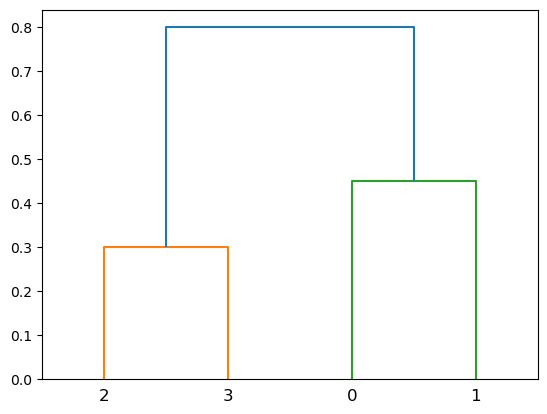

In [79]:
complete_Z = hierarchy.linkage(condensed_data, 'complete','euclidean')
plt.figure()
dn = hierarchy.dendrogram(complete_Z)

## Question2
匯入題目指定之種子資料。

In [80]:
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.cluster import AgglomerativeClustering
data = pd.read_csv(r"C:\Users\user\Desktop\機器學習助教\seeds_dataset.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   area                     210 non-null    float64
 1   perimeter                210 non-null    float64
 2   compactness              210 non-null    float64
 3   length of kernel         210 non-null    float64
 4   width of kernel          210 non-null    float64
 5   asymmetry coefficient    210 non-null    float64
 6   length of kernel groove  210 non-null    float64
 7   varieties                210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


將X訂為排除類別的其餘距離相關資料，y則為類別資料，並將之分群label和等下分群結果的label契合，方便我們進行精確度的運算。

In [81]:
X = data.drop(labels=['varieties'],axis = 1)
data.loc[data['varieties'] == 3] = 0
data.loc[data['varieties'] == 1] = 3
data.loc[data['varieties'] == 2] = 1
data.loc[data['varieties'] == 3] = 2
y = data['varieties']

一般不會有個特定的指標告訴我們hierarchy clustering該分為幾群，常常是試過各種群個數後才會知道，像是這題我可能會分為3群，比較好去跟原先的varieties去做精確值的比較，這裡使用分為三組分化效果最好(distance最大，但也是我們知道varieties是均勻的)的ward method。

single


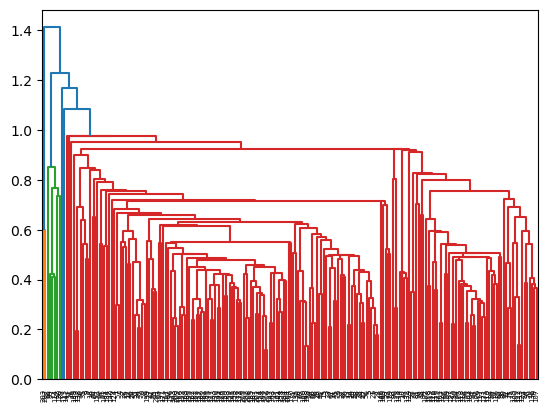

complete


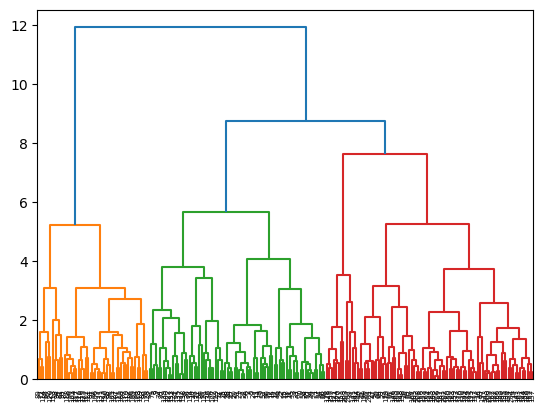

average


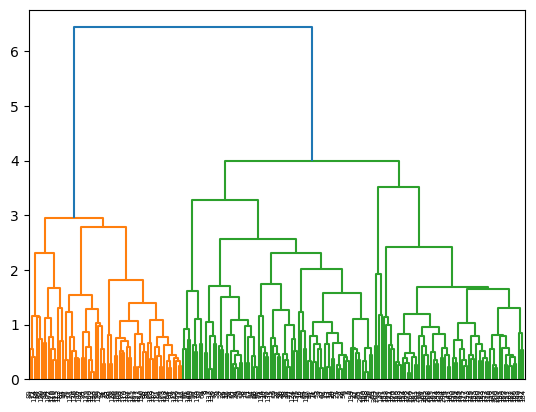

weighted


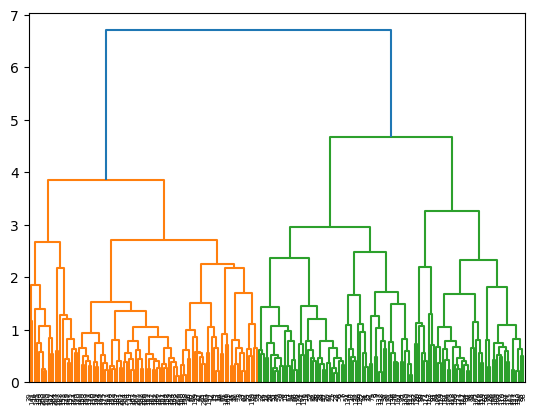

centroid


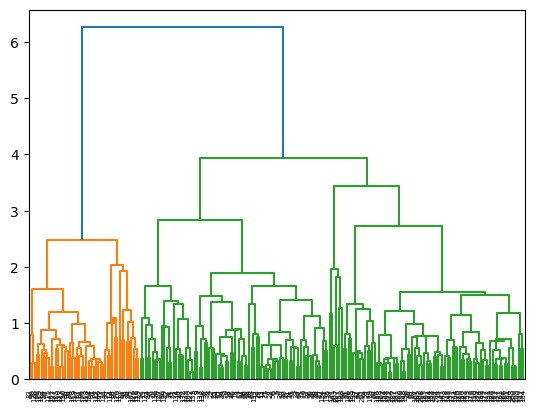

median


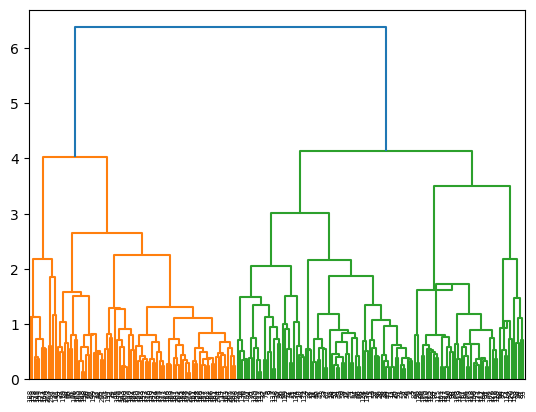

ward


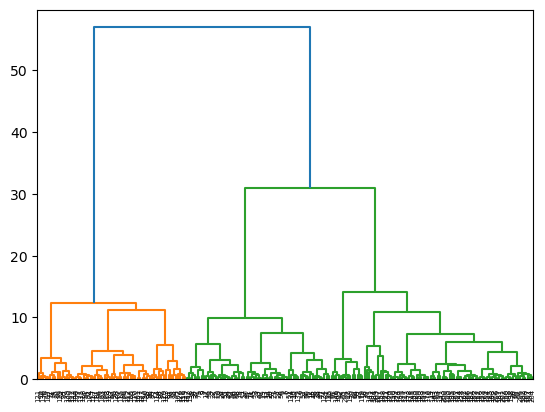

In [82]:
methods = ['single', 'complete', 'average', 'weighted', 'centroid', 'median', 'ward']

for idx, method in enumerate(methods):
    linked = linkage(X, method)
    dendrogram(linked,
            orientation = 'top', 
            labels = data.index,
            show_leaf_counts = True)
    print(method)   
    plt.show()

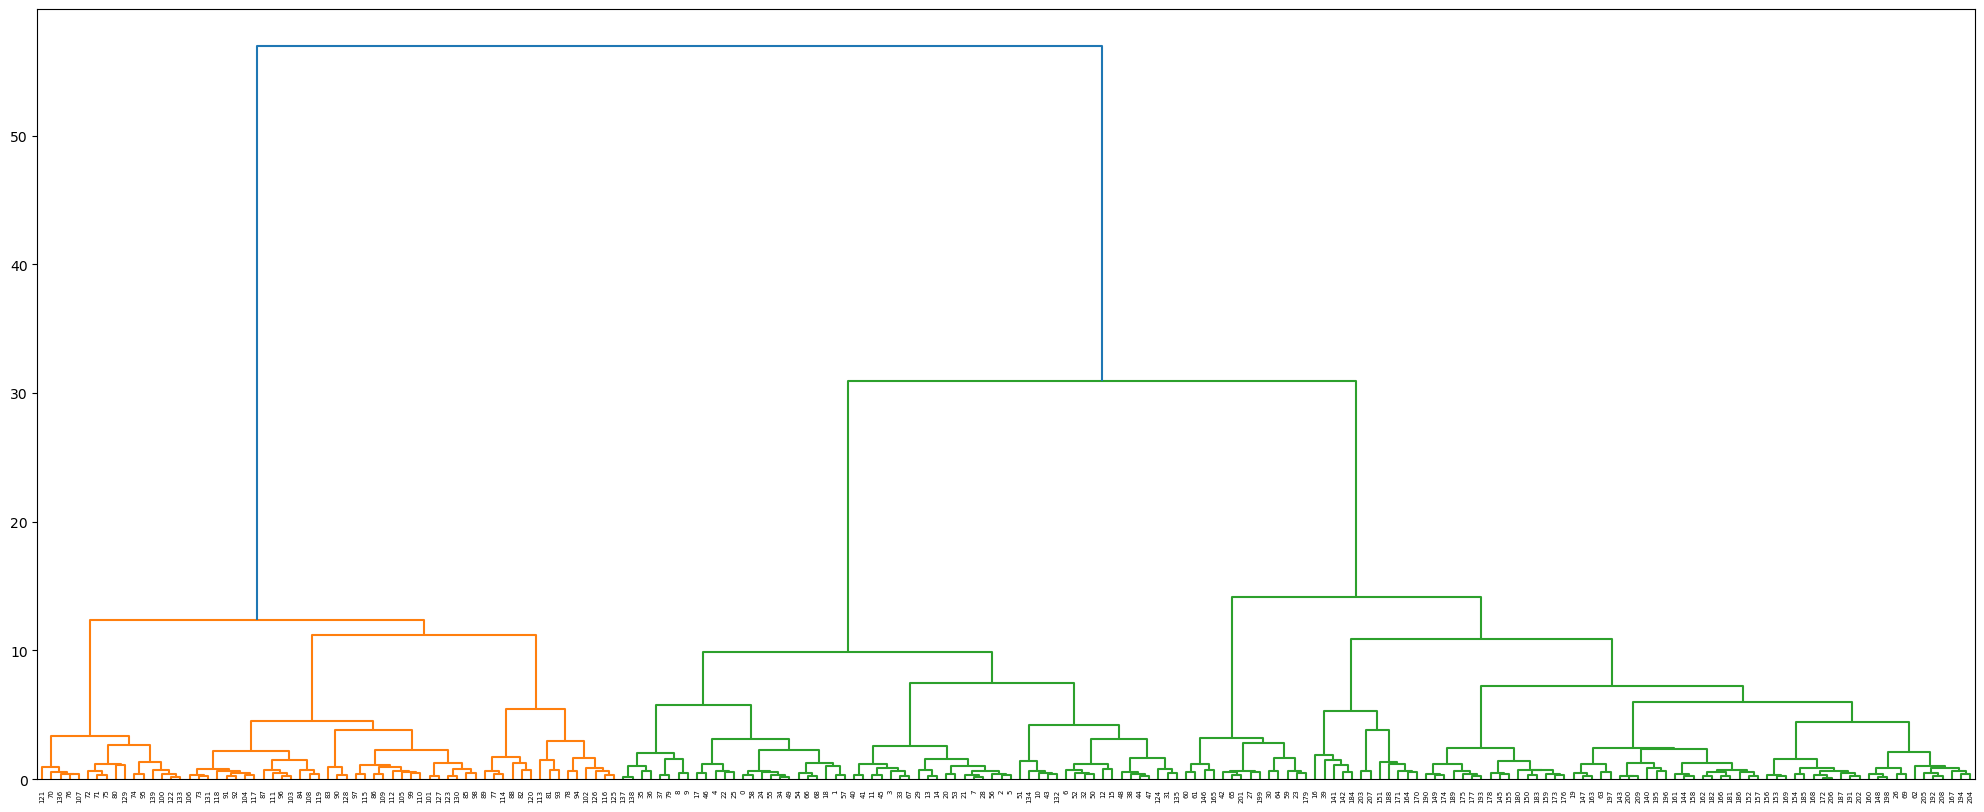

In [83]:
Z_ward = linkage(X, 'ward')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z_ward)

印出分為三群時使用階層分群法會分至哪一群，可以大致看到分群分佈結果與原始資料分群結果蠻相似的。

In [84]:
clustering_ward = AgglomerativeClustering(n_clusters = 3, linkage = 'ward', compute_distances = True).fit(X)

使用confusion_matrix了解各群階層式分類結果預測正確或錯誤之個數。

In [85]:
confusion_matrix(y,clustering_ward.labels_)

array([[70,  0,  0],
       [ 0, 63,  7],
       [16,  0, 54]], dtype=int64)

## Question3

將AirQuality資料匯入

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
air_data = pd.read_csv(r"C:\Users\user\Desktop\機器學習助教\AirQualityUCI.csv")

在資料集我們可以發現數值-200代表缺失值，因此這裡可以先將-200設為np.NAN

In [87]:
air_data = air_data.replace(-200, np.NaN)

判斷每個欄位數值的缺失情況，NMHC(GT)缺失值過多，我們考慮將其刪除，剩餘則考慮以中位數替代

In [88]:
air_data.isna().sum() 

Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

In [89]:
air_data = air_data.drop('NMHC(GT)', axis=1)

In [90]:
air_data['CO(GT)'] = air_data['CO(GT)'].fillna(air_data['CO(GT)'].median())
air_data['PT08.S1(CO)'] = air_data['PT08.S1(CO)'].fillna(air_data['PT08.S1(CO)'].median())
air_data['C6H6(GT)'] = air_data['C6H6(GT)'].fillna(air_data['C6H6(GT)'].median())
air_data['PT08.S2(NMHC)'] = air_data['PT08.S2(NMHC)'].fillna(air_data['PT08.S2(NMHC)'].median())
air_data['NOx(GT)'] = air_data['NOx(GT)'].fillna(air_data['NOx(GT)'].median())
air_data['PT08.S3(NOx)'] = air_data['PT08.S3(NOx)'].fillna(air_data['PT08.S3(NOx)'].median())
air_data['NO2(GT)'] = air_data['NO2(GT)'].fillna(air_data['NO2(GT)'].median())
air_data['PT08.S4(NO2)'] = air_data['PT08.S4(NO2)'].fillna(air_data['PT08.S4(NO2)'].median())
air_data['PT08.S5(O3)'] = air_data['PT08.S5(O3)'].fillna(air_data['PT08.S5(O3)'].median())
air_data['T'] = air_data['T'].fillna(air_data['T'].median())
air_data['RH'] = air_data['RH'].fillna(air_data['RH'].median())
air_data['AH'] = air_data['AH'].fillna(air_data['AH'].median())

## (1)

In [91]:
air_data.describe()

CO(GT)  PT08.S1(CO)     C6H6(GT)  PT08.S2(NMHC)      NOx(GT)  \
count  9357.000000  9357.000000  9357.000000    9357.000000  9357.000000   
mean      2.089302  1098.392433    10.009447     937.973923   235.178903   
std       1.323024   212.911465     7.311771     261.625561   195.091025   
min       0.100000   647.000000     0.100000     383.000000     2.000000   
25%       1.200000   941.000000     4.600000     743.000000   112.000000   
50%       1.800000  1063.000000     8.200000     909.000000   180.000000   
75%       2.600000  1221.000000    13.600000    1105.000000   284.000000   
max      11.900000  2040.000000    63.700000    2214.000000  1479.000000   

       PT08.S3(NOx)      NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)            T  \
count   9357.000000  9357.000000   9357.000000  9357.000000  9357.000000   
mean     834.339959   112.373303   1456.528054  1020.562894    18.297574   
std      251.808888    43.948519    339.370072   390.784960     8.658221   
min      322.000000     2.000000    551.000000   221.000000    -1.900000   
25%      666.000000    86.000000   1242.000000   742.000000    12.000000   
50%      806.000000   109.000000   1463.000000   963.000000    17.800000   
75%      960.000000   133.000000   1662.000000  1255.000000    24.100000   
max     2683.000000   340.000000   2775.000000  2523.000000    44.600000   

                RH           AH  
count  9357.000000  9357.000000  
mean     49.248509     1.024352  
std      16.974949     0.395878  
min       9.200000     0.184700  
25%      36.600000     0.746100  
50%      49.600000     0.995400  
75%      61.900000     1.296200  
max      88.700000     2.231000

做一些簡單的EDA分析:

In [92]:
air_data.isnull().values.any()

False

In [93]:
air_data.nunique()

Date              391
Time               24
CO(GT)             96
PT08.S1(CO)      1041
C6H6(GT)          407
PT08.S2(NMHC)    1245
NOx(GT)           925
PT08.S3(NOx)     1221
NO2(GT)           283
PT08.S4(NO2)     1603
PT08.S5(O3)      1743
T                 436
RH                753
AH               6683
dtype: int64

array([[<AxesSubplot:title={'center':'CO(GT)'}>,
        <AxesSubplot:title={'center':'PT08.S1(CO)'}>,
        <AxesSubplot:title={'center':'C6H6(GT)'}>],
       [<AxesSubplot:title={'center':'PT08.S2(NMHC)'}>,
        <AxesSubplot:title={'center':'NOx(GT)'}>,
        <AxesSubplot:title={'center':'PT08.S3(NOx)'}>],
       [<AxesSubplot:title={'center':'NO2(GT)'}>,
        <AxesSubplot:title={'center':'PT08.S4(NO2)'}>,
        <AxesSubplot:title={'center':'PT08.S5(O3)'}>],
       [<AxesSubplot:title={'center':'T'}>,
        <AxesSubplot:title={'center':'RH'}>,
        <AxesSubplot:title={'center':'AH'}>]], dtype=object)

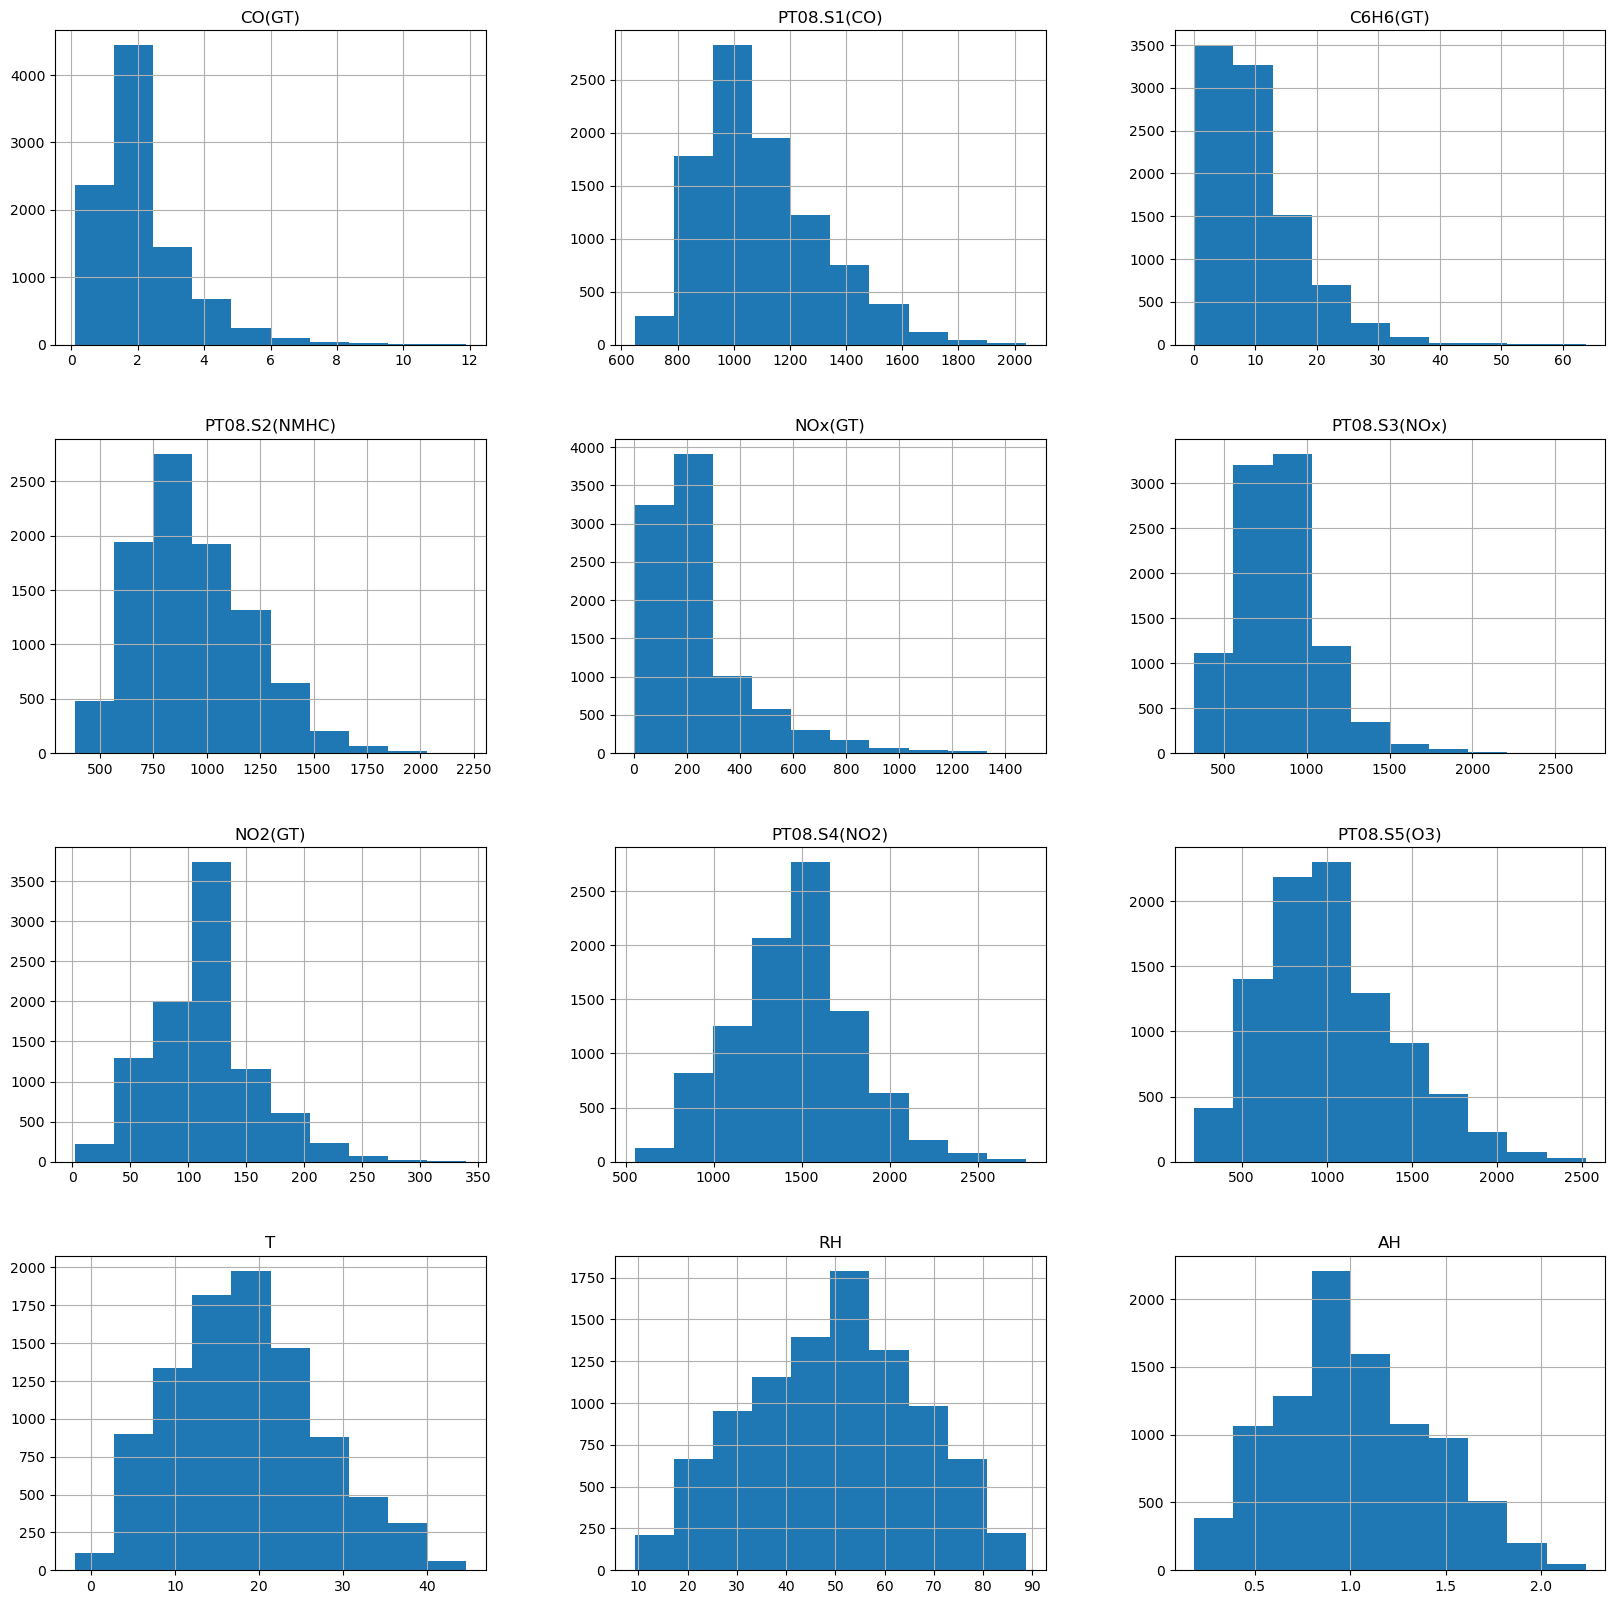

In [94]:
air_data.hist(figsize=(20,20))

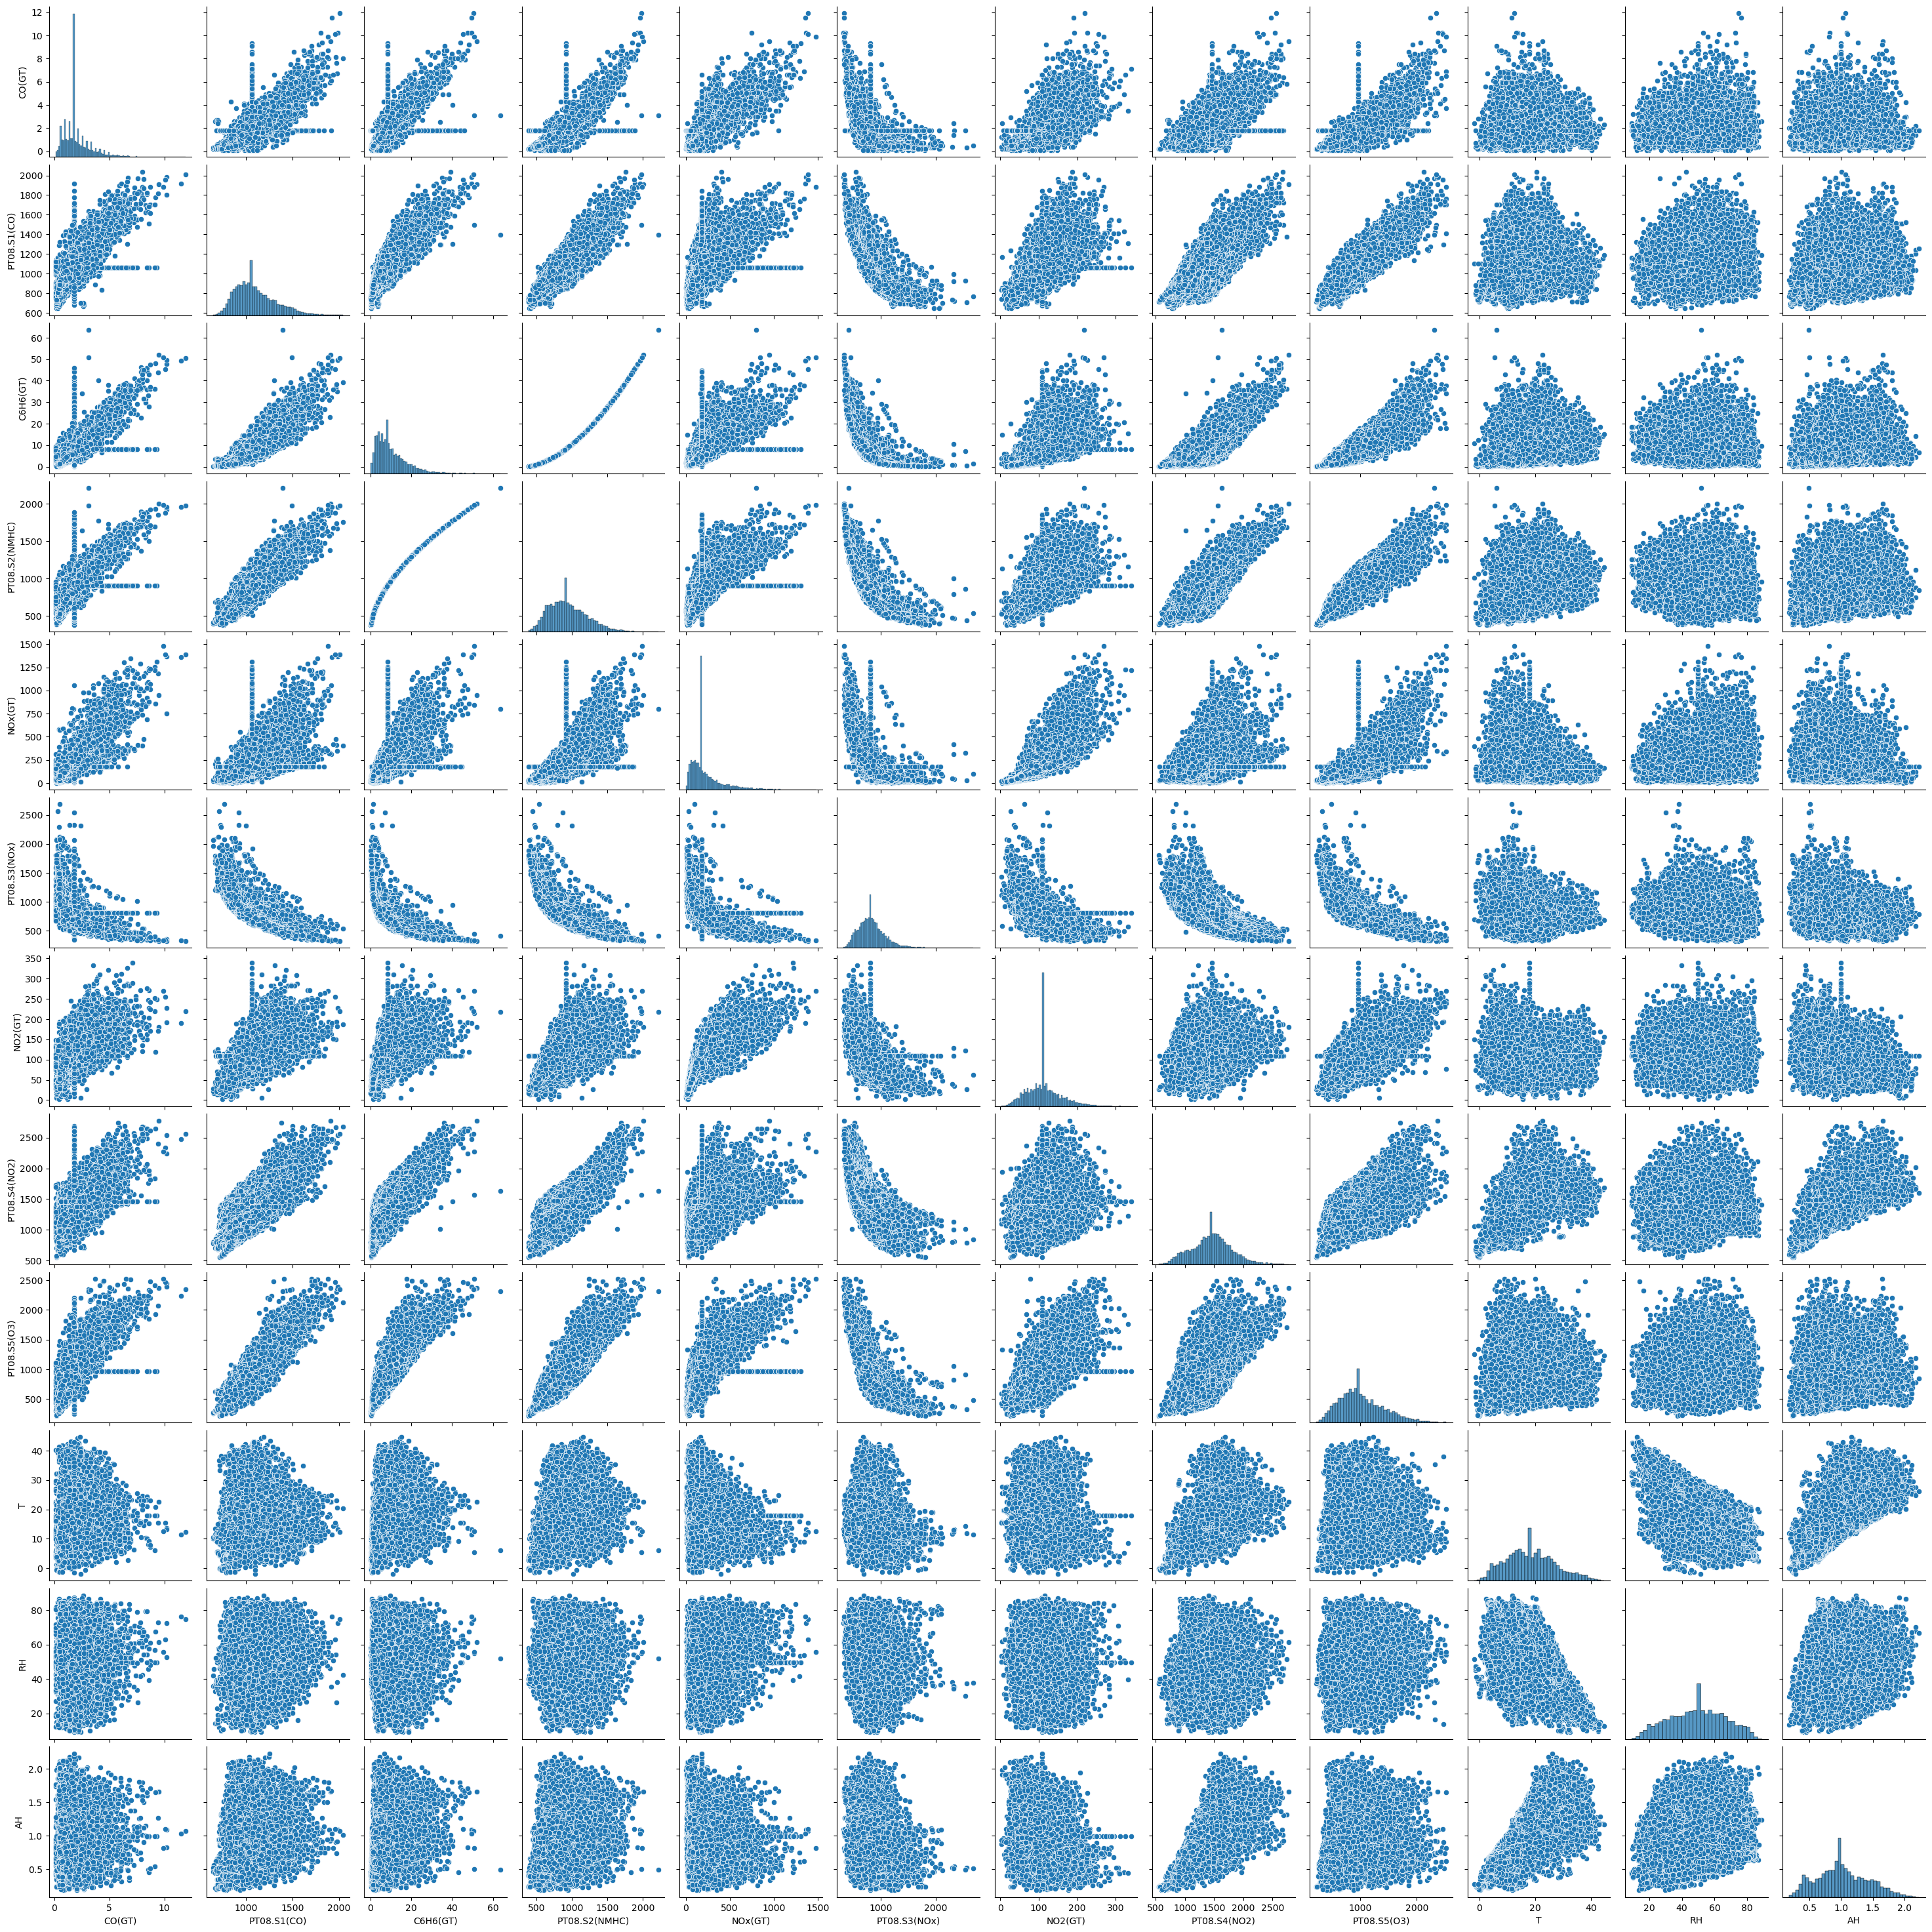

In [95]:
sns.pairplot(air_data)
plt.show()

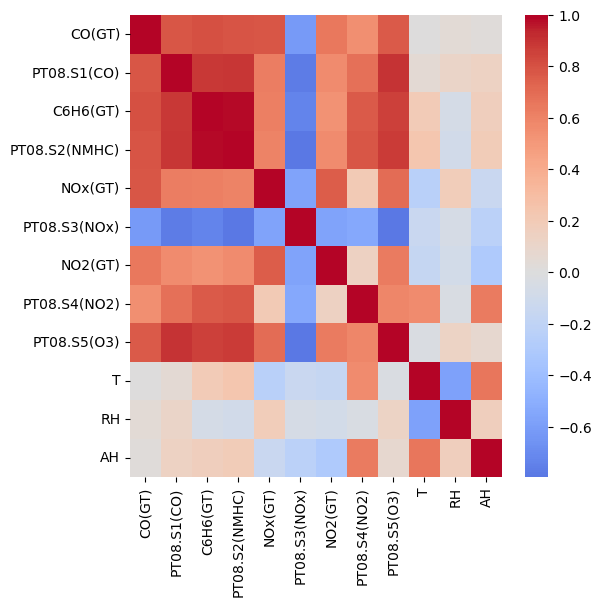

In [96]:
plt.figure(figsize=(6,6))
sns.heatmap(air_data.corr(), annot = False, center=0.0, cmap='coolwarm');
plt.savefig('heatmap.png')
plt.show()

將資料做標準化的動作，並剔除時間資料進行2 components的PCA

## (2)

In [97]:
from sklearn.preprocessing import StandardScaler
air_data = air_data.iloc[:, 2:]
air_data = StandardScaler().fit_transform(air_data)
PCA2 = PCA(n_components = 2)
principalComponents2 = PCA2.fit_transform(air_data)
principal_df = pd.DataFrame(data = principalComponents2, columns = ['principal component 1', 'principal component 2'])

2 components製作出的數值

In [98]:
principal_df

principal component 1  principal component 2
0                  0.787594               0.351188
1                 -0.503334               0.260236
2                  0.001137               0.649535
3                  0.299099               0.840512
4                 -0.734555               0.821566
...                     ...                    ...
9352               2.787863               0.964250
9353               1.298838               0.547566
9354               1.070755               0.243826
9355              -0.343018               0.231913
9356               0.335400               0.222510

[9357 rows x 2 columns]

## (3)

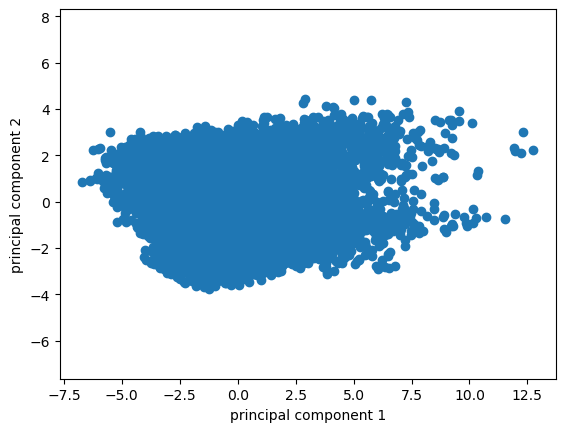

In [99]:
plt.plot(principalComponents2[:,0], principalComponents2[:,1], 'o')
plt.axis('equal')
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
plt.show()

## (4)

可以看到n_components = 4左右時變異數解釋能力下降到小於5%，因此我們考慮取3個components

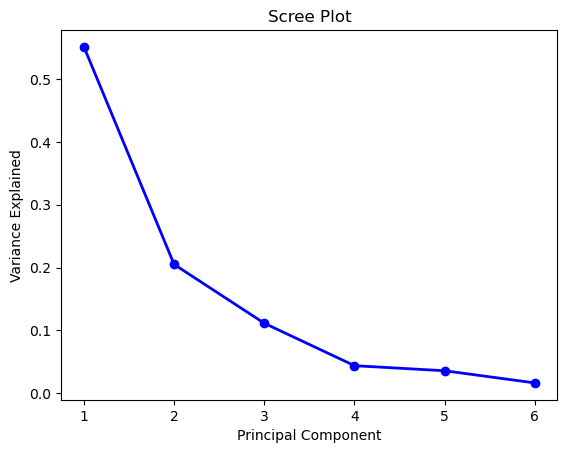

In [100]:
pca = PCA(n_components = 6)
pca_fit = pca.fit(air_data)
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

## (5)
重做一次n_components = 3的PCA分析

In [101]:
PCA3 = PCA(n_components = 3)
principalComponents3 = PCA3.fit_transform(air_data)
principal_df3 = pd.DataFrame(data = principalComponents3, columns = ['principal component 1', 'principal component 2', 'principal component 3'])

In [102]:
principal_df3

principal component 1  principal component 2  principal component 3
0                  0.787594               0.351188              -0.011213
1                 -0.503334               0.260236               0.029427
2                  0.001137               0.649535              -0.263492
3                  0.299099               0.840512              -0.588722
4                 -0.734555               0.821566              -0.551208
...                     ...                    ...                    ...
9352               2.787863               0.964250               1.696289
9353               1.298838               0.547566               2.151351
9354               1.070755               0.243826               2.596243
9355              -0.343018               0.231913               3.030682
9356               0.335400               0.222510               3.103883

[9357 rows x 3 columns]

C:\Users\user\AppData\Local\Temp\ipykernel_24728\2372528853.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


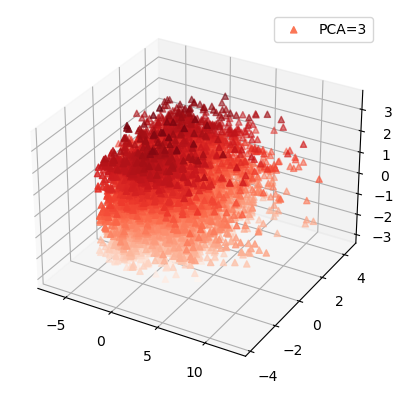

In [103]:
fig = plt.figure()
ax = fig.gca(projection='3d')

x = principalComponents3[:,0]
y = principalComponents3[:,1]
z = principalComponents3[:,2]

ax.scatter(x, y, z, c=z, cmap='Reds', marker='^', label='PCA=3')
ax.legend()
plt.show()